### Exponential Distribution


##### The following simulates a Poisson distribution using the **discrete event method**.

In [26]:
import numpy as np
import random as rdm

# Create a Poisson distribution using the discrete event method

gamma=1
N=0
t0=0
tf = 3

times=[t0]

t=t0
while (t<tf):
    t += np.random.exponential(1/gamma)

    # "Manual" way to calculate the random sample (from a uniform random number)
    # t += -np.log(rdm.random())/gamma
    N += 1
    times.append(t)


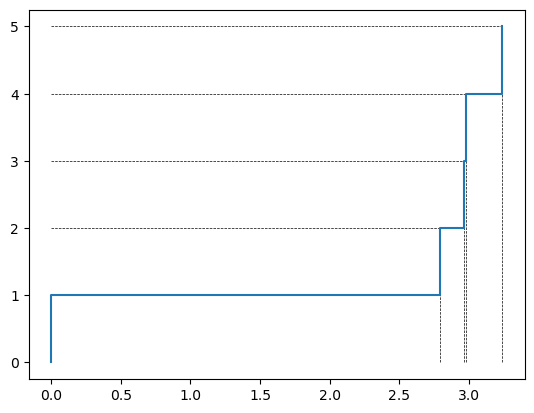

In [27]:
import matplotlib.pyplot as plt;

# Plot the Poisson distribution obtained

ntimes = len(times)
events = np.linspace(0,N,ntimes)


x=[0]
y=[0]

N=0
for i in range(ntimes):
    x += [times[i],times[i]]
    y += [N, N+1]
    N +=1

    plt.plot([times[i],times[i]], [0,N], '--k', linewidth='0.5');
    plt.plot([0,times[i]], [N,N], '--k', linewidth='0.5');
    


# plt.plot(times, events);
plt.plot(x,y);

##### The following simulates a Poisson distribution using the **$\tau$-leaping method**.

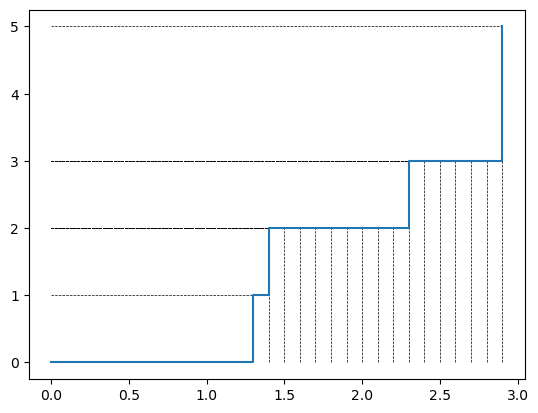

In [31]:
import matplotlib.pyplot as plt;

# Plot the Poisson distribution obtained

nevents = len(events)
times = np.linspace(0,3,nevents)


x=[0]
y=[0]

t=0
for i in range(nevents-1):
    x += [times[i],times[i]]
    y += [events[i], events[i+1]]
    # N +=1

    plt.plot([times[i],times[i]], [0,events[i]], '--k', linewidth='0.5');
    plt.plot([0,times[i]], [events[i],events[i]], '--k', linewidth='0.5');

plt.plot([0,times[nevents-2]], [events[nevents-1],events[nevents-1]], '--k', linewidth='0.5');



# plt.plot(times, events);
plt.plot(x,y);

0.41154277802895156
0.969745961447172
0.9241470657050598
0.9139386173861398
0.2222308500455148
0.379974703029614
0.8761116721939884
0.9710516895259864
0.4006914638431571
0.9416902975995713
0.24869367336822779
0.2544165159649725
0.3593096335993661
0.8880192694012973
0.3344787362014964


/tmp/ipykernel_1669/3955935706.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sol[i]=solution[0]


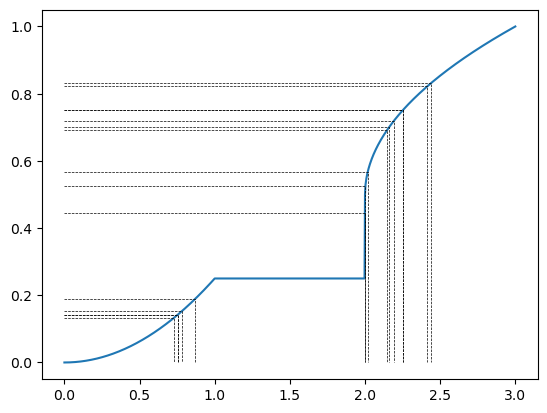

In [2]:
import numpy as np
import random as rdm
from scipy.optimize import fsolve
import matplotlib.pyplot as plt;


def F(x):

    if (x<0): return 0
    elif (x<1): return x*x/4
    elif (x<2): return 1/4
    elif (x<3): return (2+2*np.sqrt(x-2))/4
    else : return 1

Fv = np.vectorize(F)

npts=1000

t = np.linspace(0,3,npts)
Fp = Fv(t)

plt.plot(t,Fp);


N=30

sol = np.zeros(N)

for i in range(N):
    U = rdm.random()
    func = lambda t: F(t) - U;
    
    solution = fsolve(func, 2.5,full_output=1)
    if (sol[2]!=1):
        solution = fsolve(func, 0.5,full_output=1)
    
    
    if (solution[2]==1):  # plot the point only if fsolve found a solution
        sol[i]=solution[0]

        Px=[0, sol[i], sol[i]]
        Py=[U, U, 0]
     
        plt.plot(Px,Py,'--k',linewidth='0.5');
    else:
        print(U)
    #     Px=[0, sol[i], sol[i]]
    #     Py=[U, U, 0]
    #     
    #     plt.plot(Px,Py,'--r',linewidth='0.5')
        

